<a href="https://colab.research.google.com/github/ChenxiLiu8/ANLY590/blob/master/Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Chenxi Liu**
# **Homework1**

In [56]:
uploaded = files.upload()

Saving Hitters.csv to Hitters (1).csv


In [57]:
import pandas as pd
from sklearn.linear_model import Lasso, Ridge, LassoCV, RidgeCV
from sklearn.model_selection import GridSearchCV
from google.colab import files
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## **Problem 1**

### **Read in data**

In [58]:
df = pd.read_csv('Hitters.csv')

### **Split data frame**
* drop null and categorical columns

In [59]:
df = df.drop(['Unnamed: 0', 'League', 'Division', 'NewLeague'], axis=1)
df = df.dropna()

X = df.iloc[:, :-1]
Y = df.iloc[:, 16]

### **Model Building and Testing**

In [60]:
# declear a set of alphas 
alphas = 10**np.linspace(10,-5,100)
# split data into training and testing (20% testing , 80% training)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)
# model building
lasso = Lasso(max_iter=20000, normalize=True)
coefficent=[]
for num in alphas:
  lasso.set_params(alpha=num)
  lasso.fit(X_train,Y_train)
  coefficent.append(lasso.coef_)

Text(0.5, 1.0, 'coefficient trajectories')

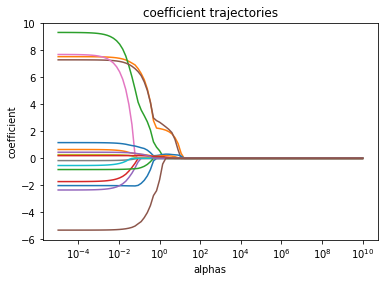

In [61]:
graph = plt.gca()
graph.plot(alphas, coefficent)
graph.set_xscale('log')
plt.xlabel('alphas')
plt.ylabel('coefficient')
plt.title('coefficient trajectories')

### **Lasso Predictor Selection**


In [62]:
# model from alpha = 1 to alph = 19 (from previous graph) unitl there are only 3 left
for i in range(1,20):
  lasso = Lasso(alpha=i, max_iter=20000, normalize=True)
  lasso.fit(X,Y)
  if np.sum(lasso.coef_!=0) == 3:
    coefficent_list = pd.Series(lasso.coef_, index=X.columns)
    print(coefficent_list)
    break

# According to the list below the three preddictors remain is Hits, CRuns and CRBI

AtBat      0.000000
Hits       0.329475
HmRun      0.000000
Runs       0.000000
RBI        0.000000
Walks      0.000000
Years      0.000000
CAtBat     0.000000
CHits      0.000000
CHmRun     0.000000
CRuns      0.076322
CRBI       0.204475
CWalks     0.000000
PutOuts    0.000000
Assists    0.000000
Errors     0.000000
dtype: float64


In [63]:
lassocv = LassoCV(cv = 10, max_iter = 20000,normalize = True)
lassocv.fit(X_train, Y_train)

LassoCV(alphas=None, copy_X=True, cv=10, eps=0.001, fit_intercept=True,
        max_iter=20000, n_alphas=100, n_jobs=None, normalize=True,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

In [64]:
print(lassocv.alpha_)
# the optimal alpha after regularization is 0.178

0.17769495773829372


In [65]:
lasso.set_params(alpha=lassocv.alpha_)

Lasso(alpha=0.17769495773829372, copy_X=True, fit_intercept=True,
      max_iter=20000, normalize=True, positive=False, precompute=False,
      random_state=None, selection='cyclic', tol=0.0001, warm_start=False)

In [66]:
lasso.fit(X, Y)
print(pd.Series(lasso.coef_, index=X.columns))
print(np.sum(lasso.coef_!=0))
# 12 total predictors left in the model

AtBat     -1.719000
Hits       6.108321
HmRun     -0.000000
Runs       0.000000
RBI        0.260461
Walks      4.762928
Years     -9.170017
CAtBat    -0.000000
CHits      0.000000
CHmRun     0.559134
CRuns      0.692231
CRBI       0.312910
CWalks    -0.491361
PutOuts    0.280399
Assists    0.185596
Errors    -1.739738
dtype: float64
12


## **Problem 2**

In [67]:
ridge = Ridge(normalize=True)
coefficent=[]
for num in alphas:
  ridge.set_params(alpha=num)
  ridge.fit(X_train,Y_train)
  coefficent.append(ridge.coef_)

Text(0.5, 1.0, 'coefficient trajectories')

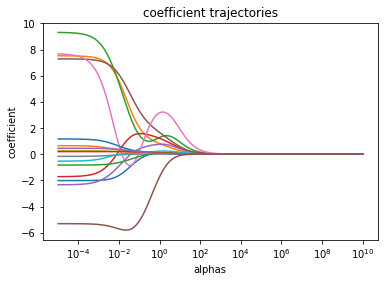

In [68]:
graph = plt.gca()
graph.plot(alphas, coefficent)
graph.set_xscale('log')
plt.xlabel('alphas')
plt.ylabel('coefficient')
plt.title('coefficient trajectories') 

In [69]:
ridgecv = RidgeCV(alphas=alphas, scoring='neg_mean_squared_error', normalize=True)
ridgecv.fit(X_train, Y_train)

RidgeCV(alphas=array([1.00000000e+10, 7.05480231e+09, 4.97702356e+09, 3.51119173e+09,
       2.47707636e+09, 1.74752840e+09, 1.23284674e+09, 8.69749003e+08,
       6.13590727e+08, 4.32876128e+08, 3.05385551e+08, 2.15443469e+08,
       1.51991108e+08, 1.07226722e+08, 7.56463328e+07, 5.33669923e+07,
       3.76493581e+07, 2.65608778e+07, 1.87381742e+07, 1.32194115e+07,
       9.32603347e+06, 6.57933225e+0...
       1.87381742e-03, 1.32194115e-03, 9.32603347e-04, 6.57933225e-04,
       4.64158883e-04, 3.27454916e-04, 2.31012970e-04, 1.62975083e-04,
       1.14975700e-04, 8.11130831e-05, 5.72236766e-05, 4.03701726e-05,
       2.84803587e-05, 2.00923300e-05, 1.41747416e-05, 1.00000000e-05]),
        cv=None, fit_intercept=True, gcv_mode=None, normalize=True,
        scoring='neg_mean_squared_error', store_cv_values=False)

In [70]:
print(ridgecv.alpha_)
# the optimize value is 0.015

0.01519911082952933


## **Short Answer**
* Higher bias will cause the model missing revelvant relation which cause underfitting issue. Higher Variance will cause model to be not flexible that we needed to be which cause underfitting. We would like to have low bias and low variance model. However, that is not likely to happen. So we would need to make decision to keep both bias and variance in a accptable range. 

* For both of the two models above, we get relatively low alpha (0.178, 0.015). While the alpha for the lasso is a lot higher compares to the alpha for the ridge regression which means lasso model have lower bias and lower variance compares to the ridge model which is more likely to cause underfitting issue. However, they are both have relatively low bias and high variance as they both have small penalty term